# Canny Edge Detection


In [1]:
%matplotlib inline 
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom

/home/anoo/DLNotebook/lib/python3.5/site-packages/skimage/viewer/__init__.py:6: UserWarning: Viewer requires Qt
  warn('Viewer requires Qt')


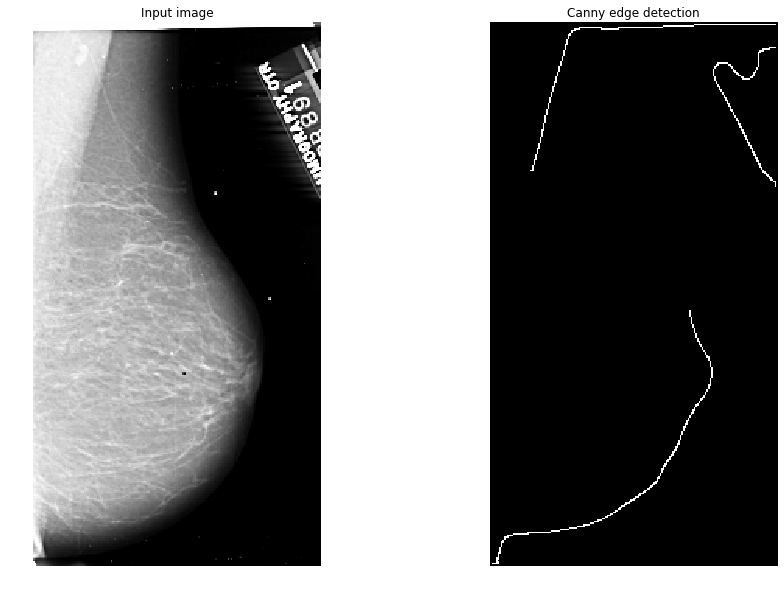

In [2]:
from skimage import io
from skimage import feature
from skimage import color
from matplotlib import pylab as pylab
img = io.imread("mammo_1.png")
img = color.rgb2gray(img)
edge = feature.canny(img,6)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(img, cmap=pylab.cm.gray), axes1.set_title('Input image')
axes2.axis('off'), axes2.imshow(edge, cmap=pylab.cm.gray), axes2.set_title('Canny edge detection')
pylab.show()

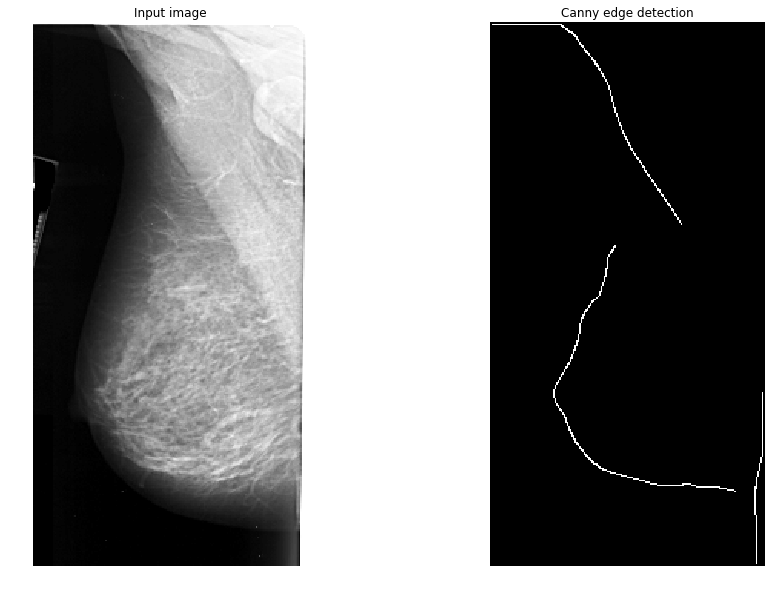

In [3]:
from skimage import io
from skimage import feature
from skimage import color
from matplotlib import pylab as pylab
img = io.imread("mammo_2.png")
img = color.rgb2gray(img)
edge = feature.canny(img,6)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(img, cmap=pylab.cm.gray), axes1.set_title('Input image')
axes2.axis('off'), axes2.imshow(edge, cmap=pylab.cm.gray), axes2.set_title('Canny edge detection')
pylab.show()

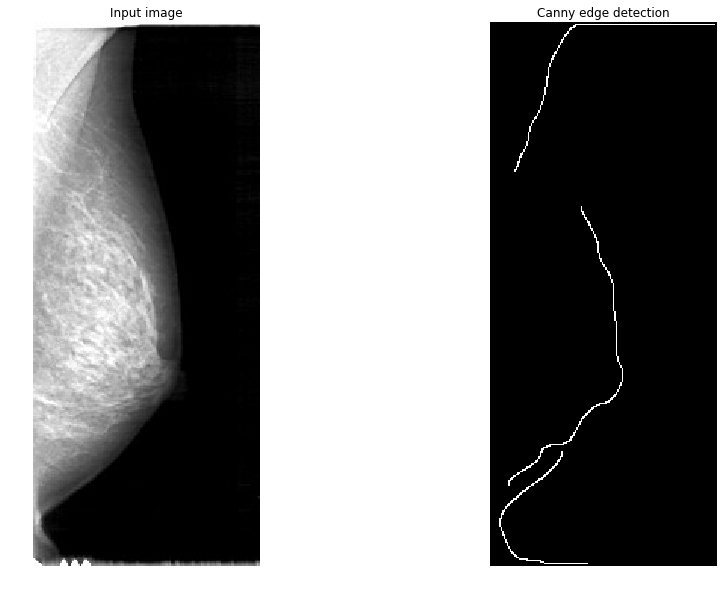

In [4]:
from skimage import io
from skimage import feature
from skimage import color
from matplotlib import pylab as pylab
img = io.imread("mammo_3.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,6)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(img, cmap=pylab.cm.gray), axes1.set_title('Input image')
axes2.axis('off'), axes2.imshow(edge, cmap=pylab.cm.gray), axes2.set_title('Canny edge detection')
pylab.show()

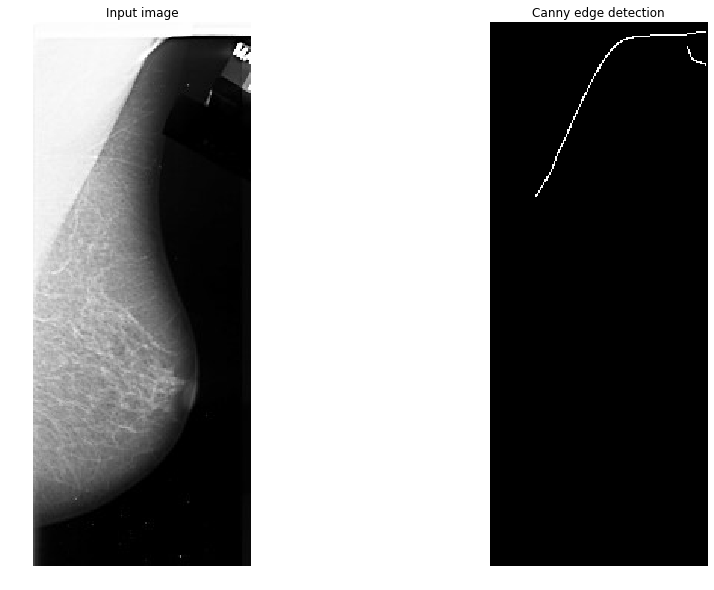

In [5]:
from skimage import io
from skimage import feature
from skimage import color
from matplotlib import pylab as pylab
img = io.imread("mammo_4.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,6)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(img, cmap=pylab.cm.gray), axes1.set_title('Input image')
axes2.axis('off'), axes2.imshow(edge, cmap=pylab.cm.gray), axes2.set_title('Canny edge detection')
pylab.show()

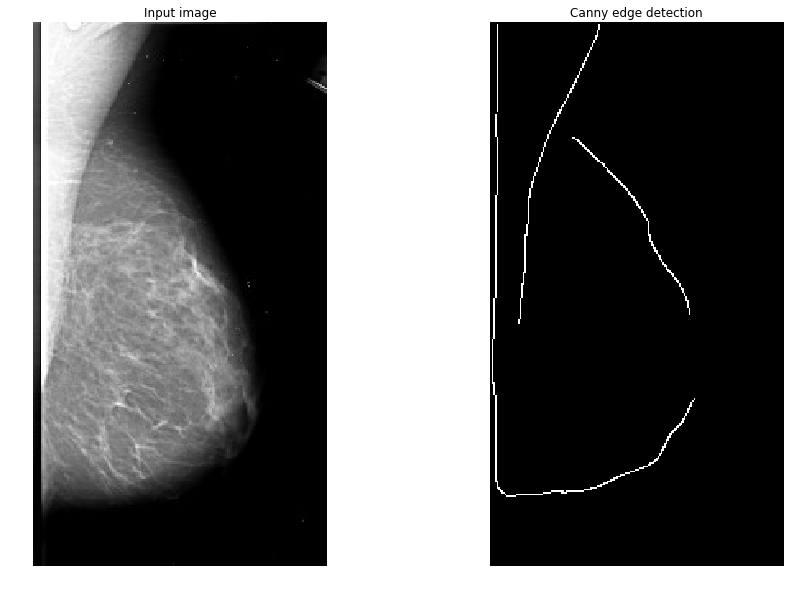

In [6]:
from skimage import io
from skimage import feature
from skimage import color
from matplotlib import pylab as pylab
img = io.imread("mammo_5.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,6)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(img, cmap=pylab.cm.gray), axes1.set_title('Input image')
axes2.axis('off'), axes2.imshow(edge, cmap=pylab.cm.gray), axes2.set_title('Canny edge detection')
pylab.show()

Dear (to be) Intern, please note the following :


> If we observe the output of <b>canny edge detection</b> on different mammograms the <font color='red'><b>pectoral muscle</b></font> separation is not happening that well.

Certain modification with the help of <b>hough transform</b> _or any other suitable transformation technique_ is required. Hence further job is to code and apply most some transformation or generate a striaght line in some way to distinguish the pectoral muscle clearly.

Post that a new image as to be generated, such that it should be without the pectoral muscle part. You can fill the pectoral muscle part with all black pixels, so that it is clearly distinguished.  

181.63045321870771
-118.35005596577946


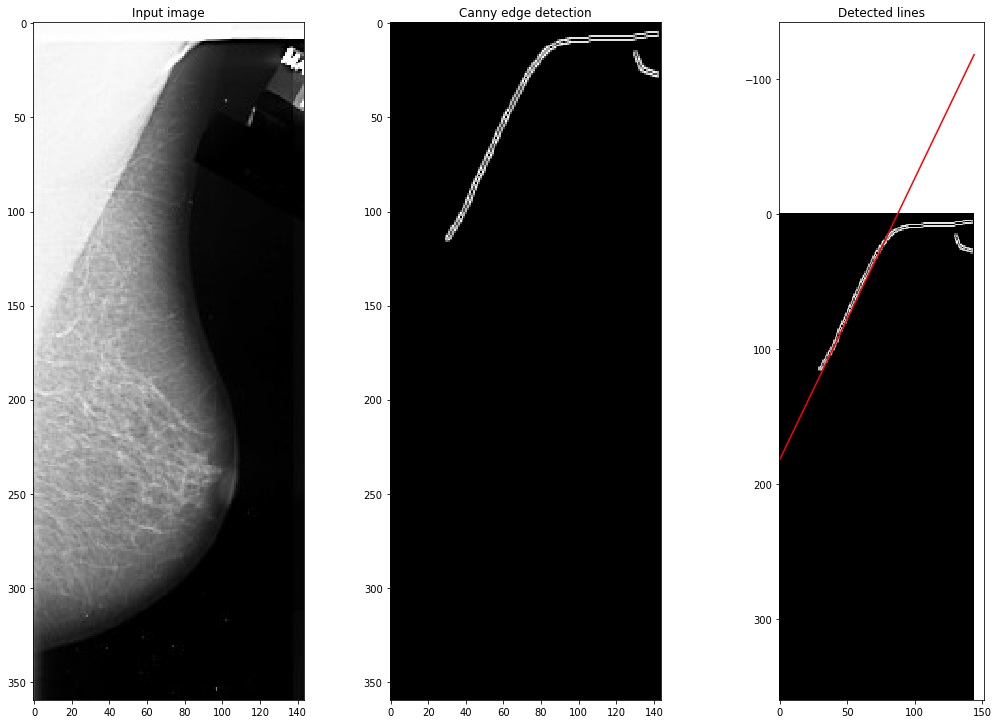

In [7]:
# Code for applying transformation like Hough Transform 
# or some other transform

from skimage import io
from skimage import feature
from skimage import filters
from skimage.transform import hough_line, hough_line_peaks
from skimage import color
from skimage.draw import polygon
from matplotlib import pylab as pylab
img = io.imread("mammo_4.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,6)

#sobel filtering on canny edge image
edge = filters.sobel(edge)

#hough transform
h, theta, d = hough_line(edge)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 10))
plt.tight_layout()

ax0.axis('on'), ax0.imshow(img, cmap=pylab.cm.gray), ax0.set_title('Input image')
ax1.axis('on'), ax1.imshow(edge, cmap=pylab.cm.gray), ax1.set_title('Canny edge detection')

#hough transform for edge line detections
ax2.imshow(edge, cmap=plt.cm.gray)
row1, col1 = edge.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
    print(y0)
    print(y1) #parameters for the line detected
ax2.set_title('Detected lines')
# ax2.set_axis_off()
pylab.show()


((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Input image'))

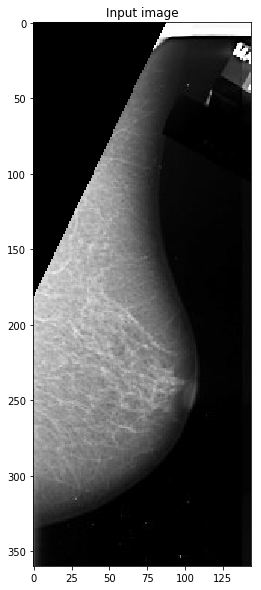

In [8]:
# Code to fill the pectoral muscle part with all black pixels, 
# so that it is clearly distinguished.


#use the parameters found by hough transform
#to detect the polygon for pectoral muscle 
from skimage.draw import polygon
r1 = np.array([-118, 181, -118, -118])
c1 = np.array([144, 0, 0, 144])
rr, cc = polygon(r1, c1)
img[rr, cc] = 0  #fill with black pixels

fig, (ax0) = plt.subplots(1, 1, figsize=(15, 10))
ax0.axis('on'), ax0.imshow(img, cmap=pylab.cm.gray), ax0.set_title('Pectoral muscle removal')


2.503209242618709
2.5032092426187
157.31336155506574
-315.61054709261805
315.38801702414486
188.52285707360025
335.3236378341874
161.09411756915708
354.7272435802659
129.7024251033984
-423.3961431403806
709.5640855342224
-41.23681368138263
357.5247449510966
-1133.5749071054552
1305.2444859562197
-197.2932456937763
535.7719186510657


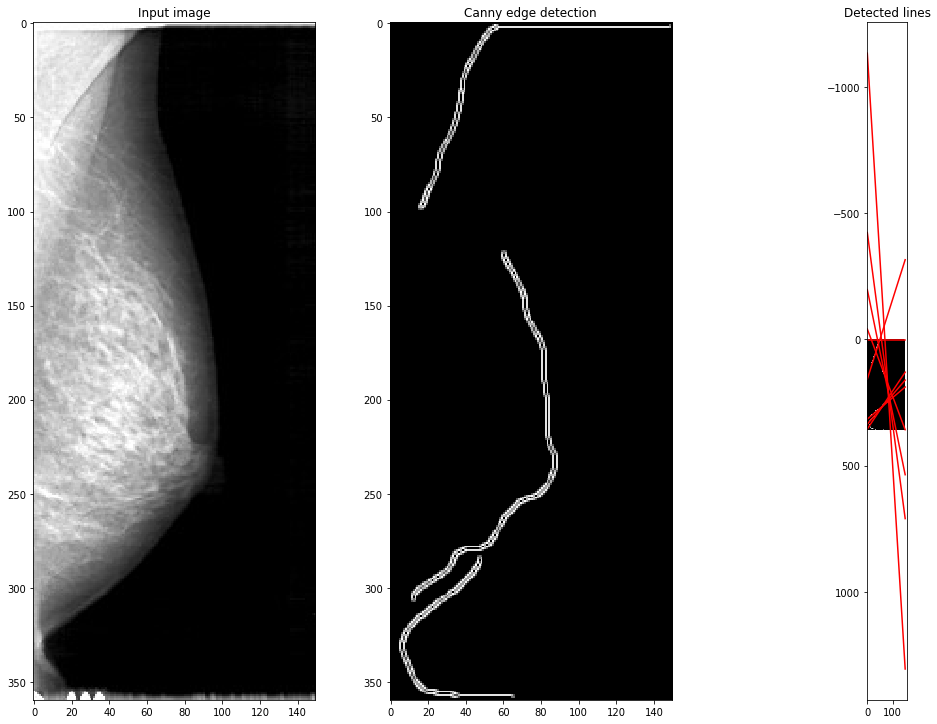

((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Input image'))

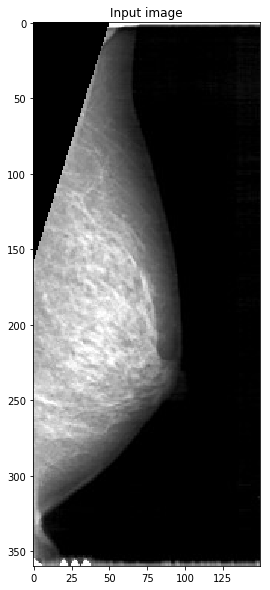

In [9]:
# Code for applying transformation like Hough Transform 
# or some other transform

from skimage import io
from skimage import feature
from skimage import filters
from skimage.transform import hough_line, hough_line_peaks
from skimage import color
from skimage.draw import polygon
from matplotlib import pylab as pylab
img = io.imread("mammo_3.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,6)

#sobel filtering on canny edge image
edge = filters.sobel(edge)

#hough transform
h, theta, d = hough_line(edge)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 10))
plt.tight_layout()

ax0.axis('on'), ax0.imshow(img, cmap=pylab.cm.gray), ax0.set_title('Input image')
ax1.axis('on'), ax1.imshow(edge, cmap=pylab.cm.gray), ax1.set_title('Canny edge detection')
# pylab.show()

ax2.imshow(edge, cmap=plt.cm.gray)
row1, col1 = edge.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
    print(y0)
    print(y1) #parameters for the line detected
ax2.set_title('Detected lines')
pylab.show()

# Code to fill the pectoral muscle part with all black pixels, 
# so that it is clearly distinguished.

#use the parameters found by hough transform
#to detect the polygon for pectoral muscle 
from skimage.draw import polygon
r1 = np.array([-315, 157, -315, -315])
c1 = np.array([col1, 0, 0, col1])
rr, cc = polygon(r1, c1)
img[rr, cc] = 0

fig, (ax4) = plt.subplots(1, 1, figsize=(15, 10))
ax4.axis('on'), ax4.imshow(img, cmap=pylab.cm.gray), ax4.set_title('Pectoral muscle removal')


The value of col1 is 185
2.5031605562578534
2.503160556257842
-242.69784771365096
110.36918504881412
204.8278358980614
-506.36457174461356
489.568246020681
151.0870945384547
335.14156822866744
298.97524941020174
366.68948916466127
245.70100380559123


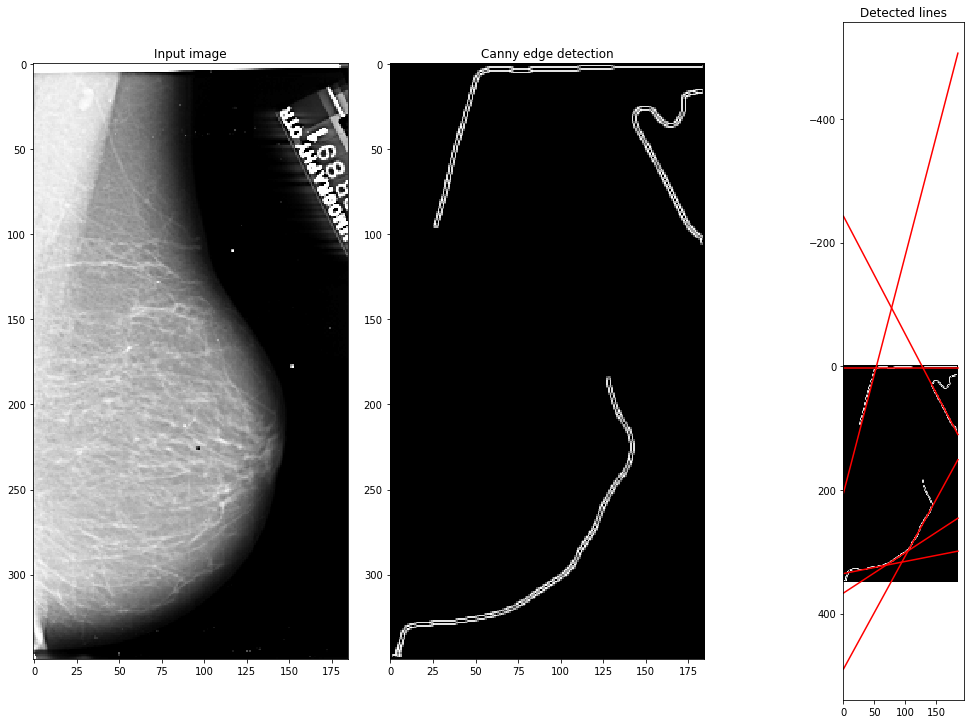

((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Input image'))

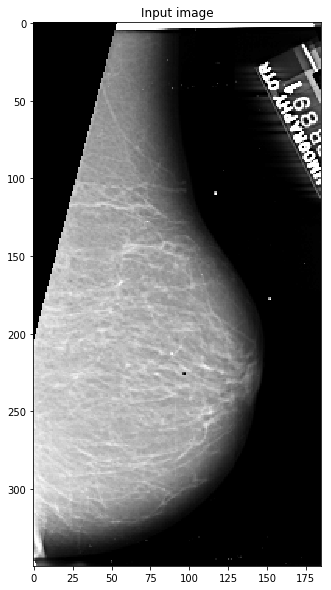

In [11]:
# Try the above 2 steps on all images from mammo_1 to mammo_5
# It should give clear visual results , where a layman can see that 
# the pectoral muscle part is filled black.


# Code for applying transformation like Hough Transform 
# or some other transform

from skimage import io
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks
from skimage import color
from skimage.draw import polygon
from matplotlib import pylab as pylab
img = io.imread("mammo_1.png")
img = color.rgb2gray(img)
img2 = io.imread("mammo_1.png")
img2 = color.rgb2gray(img2)
edge = feature.canny(img,6)

#sobel filtering on canny edge image
edge = filters.sobel(edge)

#hough transform
h, theta, d = hough_line(edge)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 10))
plt.tight_layout()

ax0.axis('on'), ax0.imshow(img, cmap=pylab.cm.gray), ax0.set_title('Input image')
ax1.axis('on'), ax1.imshow(edge, cmap=pylab.cm.gray), ax1.set_title('Canny edge detection')

ax2.imshow(edge, cmap=plt.cm.gray)
row1, col1 = edge.shape
print('The value of col1 is {}'.format(col1))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
    print(y0)
    print(y1)
ax2.set_title('Detected lines')
pylab.show()



# Code to fill the pectoral muscle part with all black pixels, 
# so that it is clearly distinguished.
from skimage.draw import polygon
r1 = np.array([-506, 204, -506, -506])
c1 = np.array([col1, 0, 0, col1])
rr, cc = polygon(r1, c1)
img[rr, cc] = 0


fig, (ax4) = plt.subplots(1, 1, figsize=(15, 10))
ax4.axis('on'), ax4.imshow(img, cmap=pylab.cm.gray), ax4.set_title('Pectoral muscle removal')

The value of col1 is 179
342.2475218579332
-87.22931210749285
-77.53367393442939
224.29187986514327
4280.072205210839
203.10370987362978
282.6337995809733
307.933008833829
291.5845707988814
304.17162659334116
272.00197494911754
316.8913117185872
-6295.168795954903
502.5717106120882
157.38580076785712
514.09312821735
185.0316514356887
453.5612681514172
457.7758689103684
-345.00933216114356
175.67756499066908
477.50311879024173
2.5031525851198353
2.503152585119824
582.7197490335594
-608.2443152498107


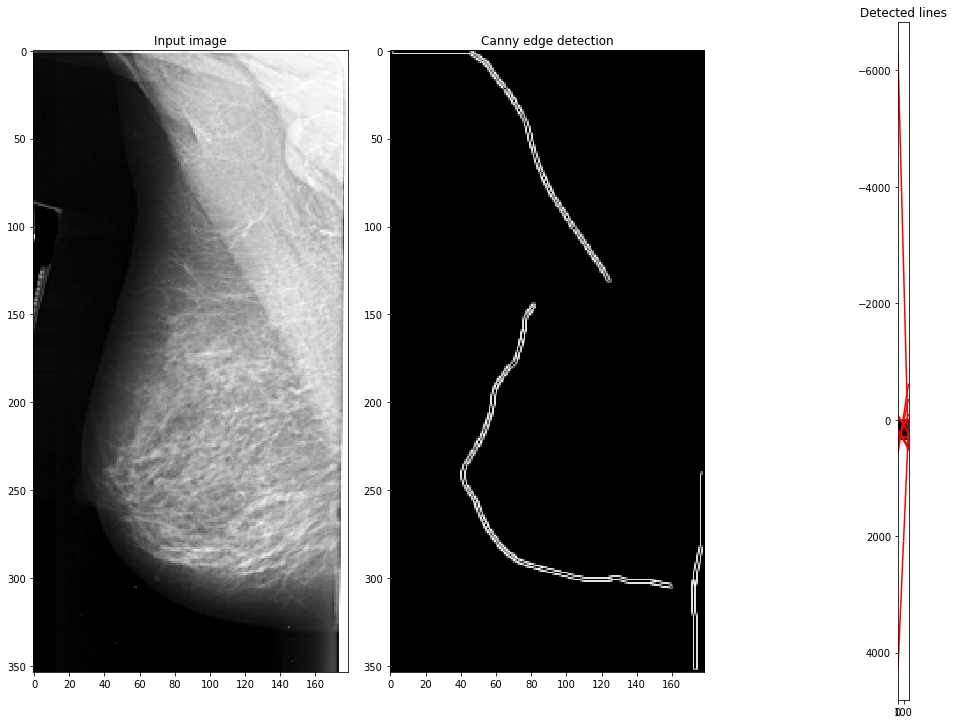

((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Pectoral muscle removal'))

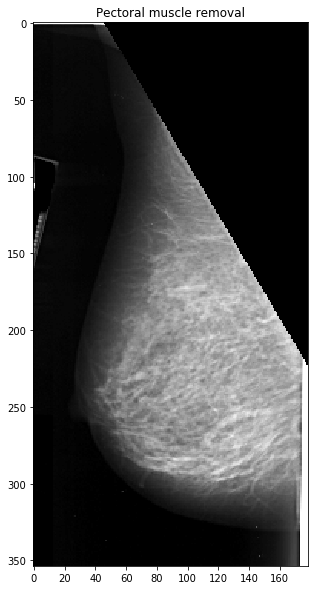

In [14]:
# Try the above 2 steps on all images from mammo_1 to mammo_5
# It should give clear visual results , where a layman can see that 
# the pectoral muscle part is filled black.


# Code for applying transformation like Hough Transform 
# or some other transform

from skimage import io
from skimage import feature
from skimage import filters
from skimage.transform import hough_line, hough_line_peaks
from skimage import color
from skimage.draw import polygon
from matplotlib import pylab as pylab
img = io.imread("mammo_2.png")
img = color.rgb2gray(img)
img2 = io.imread("mammo_2.png")
img2 = color.rgb2gray(img2)
edge = feature.canny(img,6)

#sobel filtering on canny edge image
edge = filters.sobel(edge)

#hough transform
h, theta, d = hough_line(edge)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 10))
plt.tight_layout()

ax0.axis('on'), ax0.imshow(img, cmap=pylab.cm.gray), ax0.set_title('Input image')
ax1.axis('on'), ax1.imshow(edge, cmap=pylab.cm.gray), ax1.set_title('Canny edge detection')

ax2.imshow(edge, cmap=plt.cm.gray)
row1, col1 = edge.shape
print('The value of col1 is {}'.format(col1))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
    print(y0)
    print(y1)
ax2.set_title('Detected lines')
pylab.show()



# Code to fill the pectoral muscle part with all black pixels, 
# so that it is clearly distinguished.
from skimage.draw import polygon
r1 = np.array([224, -77, -224, 77])
c1 = np.array([col1, 0, col1, col1])
rr, cc = polygon(r1, c1)
img[rr, cc] = 0


fig, (ax4) = plt.subplots(1, 1, figsize=(15, 10))
ax4.axis('on'), ax4.imshow(img, cmap=pylab.cm.gray), ax4.set_title('Pectoral muscle removal')

The value of col1 is 179
627.5925609600341
-19769.817964006088
153.6279812787802
-255.4777912244718
19.201673249277903
199.77940230140683


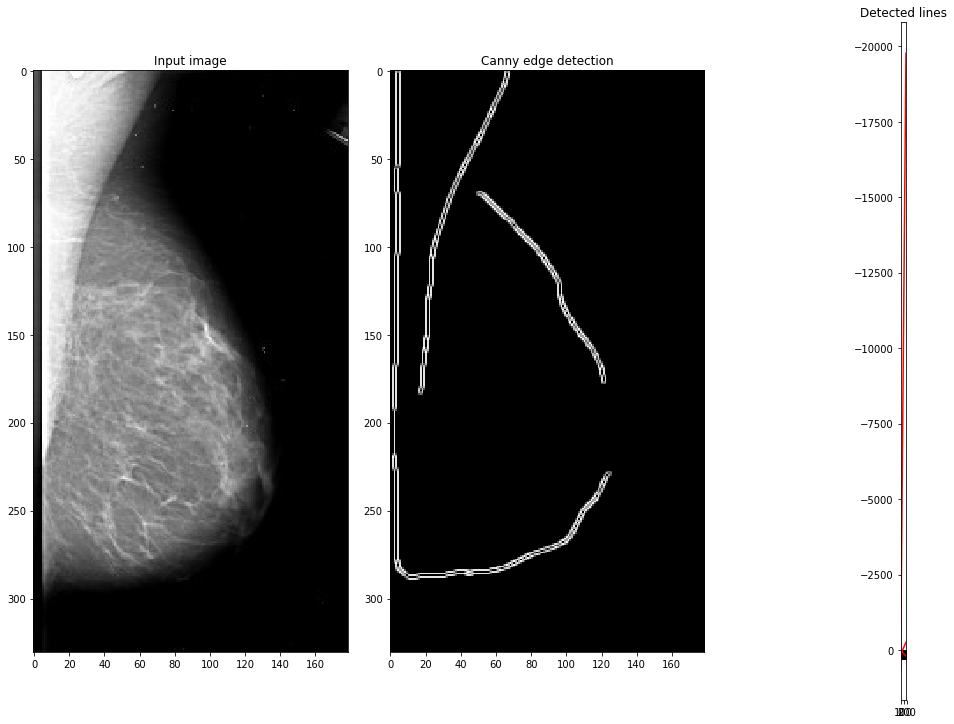

((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Pectoral muscle removal'))

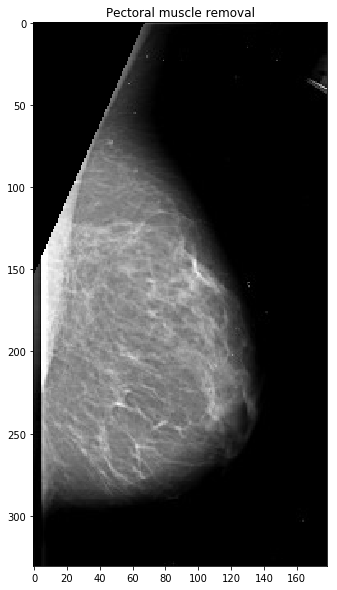

In [20]:
# Try the above 2 steps on all images from mammo_1 to mammo_5
# It should give clear visual results , where a layman can see that 
# the pectoral muscle part is filled black.


# Code for applying transformation like Hough Transform 
# or some other transform

from skimage import io
from skimage import feature
from skimage import filters
from skimage.transform import hough_line, hough_line_peaks
from skimage import color
from skimage.draw import polygon
from matplotlib import pylab as pylab
img = io.imread("mammo_5.jpg")
img = color.rgb2gray(img)
edge = feature.canny(img,6)

#sobel filtering on canny edge image
edge = filters.sobel(edge)

#hough transform
h, theta, d = hough_line(edge)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 10))
plt.tight_layout()

ax0.axis('on'), ax0.imshow(img, cmap=pylab.cm.gray), ax0.set_title('Input image')
ax1.axis('on'), ax1.imshow(edge, cmap=pylab.cm.gray), ax1.set_title('Canny edge detection')

ax2.imshow(edge, cmap=plt.cm.gray)
row1, col1 = edge.shape
print('The value of col1 is {}'.format(col1))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
    print(y0)
    print(y1)
ax2.set_title('Detected lines')
pylab.show()


# Code to fill the pectoral muscle part with all black pixels, 
# so that it is clearly distinguished.
from skimage.draw import polygon
r1 = np.array([-255, 153, -255, -255])
c1 = np.array([col1, 0, 0, col1])
rr, cc = polygon(r1, c1)
img[rr, cc] = 0


fig, (ax4) = plt.subplots(1, 1, figsize=(15, 10))
ax4.axis('on'), ax4.imshow(img, cmap=pylab.cm.gray), ax4.set_title('Pectoral muscle removal')


> **Please complete the above work and submit with-in deadline.** _Work submitted within deadlines would only be considered._

> **Submit** your work to the shivajidpawar20@gmail.com and cc : to rocky@suvenconsultants.com

> **Deadline** is specified in the LI posting / comment itself.

> Wishing each one participating "All the best". 